In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from tqdm.notebook import tqdm
from dnafiber.postprocess.core import extract_fibers, Fibers
from dnafiber.data.utils import convert_rgb_to_mask
import cv2
import numpy as np
import pandas as pd


c:\Users\cleme\miniconda3\envs\torch\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '1.4.14'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-12-12 09:50:18.499 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [2]:
original_dir = [
    Path("C:/Users/cleme/OneDrive/Documents/postdoc/data/DNAI_Original/test/annotations"),
    Path("C:/Users/cleme/OneDrive/Documents/postdoc/data/DNAI_Original/train/annotations"),
]
original_files = [f for d in original_dir for f in d.rglob("*") ]

reannotated_dir = [
    Path("C:/Users/cleme/OneDrive/Documents/postdoc/data/DNAI_Relabel/annotations/DNAI_Relabel/export/colormaps/local/train"),
    Path("C:/Users/cleme/OneDrive/Documents/postdoc/data/DNAI_Relabel/annotations/DNAI_Relabel/export/colormaps/local/test")

]
reannotated_files = [f for d in reannotated_dir for f in d.rglob("*") ]
assert len(original_files) == len(reannotated_files)

In [ ]:
fibers_original = dict()
fibers_relabel = dict()
def load_colormap(path: Path, thresh=200) -> dict[int, str]:
    img = cv2.imread(str(path), cv2.IMREAD_COLOR_RGB)
    return convert_rgb_to_mask(img, threshold=thresh)
    

for orig_img in tqdm(original_files):
    idname = "train_" + orig_img.stem if "train" in str(orig_img) else "test_" + orig_img.stem
    labelmap = load_colormap(orig_img)
    fibers = extract_fibers(labelmap)
    fibers_original[idname] = fibers
for relabel_img in tqdm(reannotated_files):
    idname = "train_" + relabel_img.stem if "train" in str(relabel_img) else "test_" + relabel_img.stem
    labelmap = load_colormap(relabel_img)
    fibers = extract_fibers(labelmap)
    fibers_relabel[idname] = fibers

  0%|          | 0/1032 [00:00<?, ?it/s]

  0%|          | 0/1032 [00:00<?, ?it/s]

In [4]:
# Count fibers
counts_original = {k: len(v) for k, v in fibers_original.items()}
counts_relabel = {k: len(v) for k, v in fibers_relabel.items()}
total_original = sum(counts_original.values())
total_relabel = sum(counts_relabel.values())



In [5]:
all_fibers_original = sum([v for k, v in fibers_original.items()], Fibers())
all_fibers_relabel = sum([v for k, v in fibers_relabel.items()], Fibers())

In [10]:
original_types = pd.Series([f.fiber_type for f in all_fibers_original.fibers]).value_counts()
relabel_types = pd.Series([f.fiber_type for f in all_fibers_relabel.fibers]).value_counts()

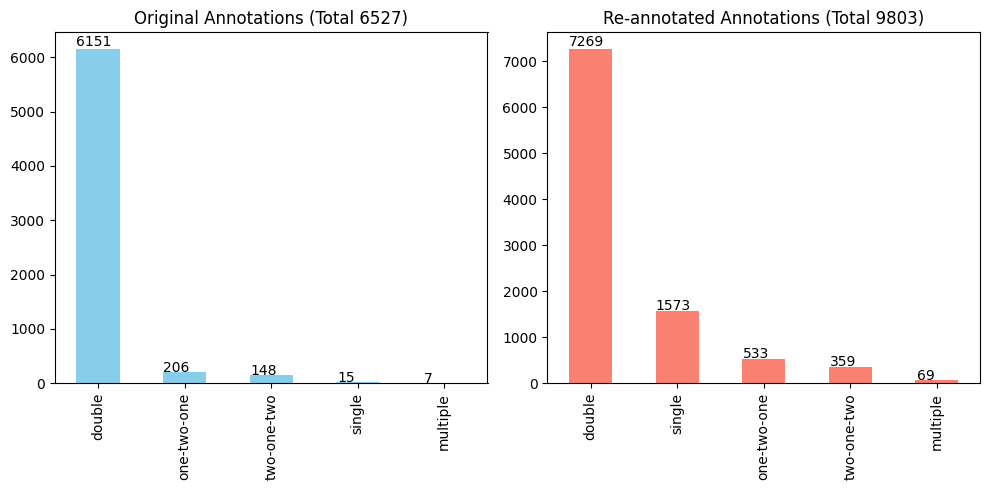

In [15]:
# Plot comparison of fiber counts
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(10,5))
original_types.plot.bar(ax=axes[0], title=f"Original Annotations (Total {original_types.sum()})", color="skyblue")
relabel_types.plot.bar(ax=axes[1], title=f"Re-annotated Annotations (Total {relabel_types.sum()})", color="salmon")
# Write counts on top of bars
for ax in axes:
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.01))
        
plt.tight_layout()
plt.show()

In [18]:
# Compute the % increase in fiber counts
increase_percent = (total_relabel - total_original) / total_original * 100 
print(f"Total fiber count increase: {increase_percent:.2f}%")

Total fiber count increase: 50.19%


In [26]:
origins_root = Path("C:/Users/cleme/OneDrive/Documents/postdoc/data/DNAI_Origins/origins/export/colormaps/local")
origin_files = list(origins_root.rglob("*"))
origins_fibers = dict()
for origin_img in tqdm(origin_files):
    idname = origin_img.stem
    labelmap = load_colormap(origin_img)
    fibers = extract_fibers(labelmap)
    origins_fibers[idname] = fibers

  0%|          | 0/55 [00:00<?, ?it/s]

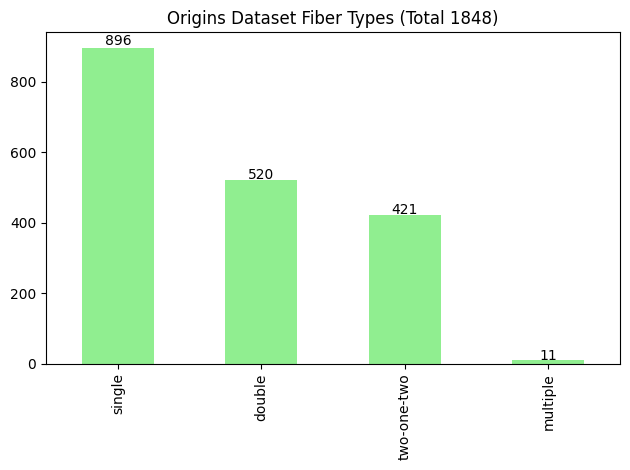

In [30]:
# Plot the distribution of fiber types in origins dataset
all_origins_fibers = sum([v for k, v in origins_fibers.items()], Fibers())
origins_types = pd.Series([f.fiber_type for f in all_origins_fibers.fibers]).value_counts()
origins_types.plot.bar(title=f"Origins Dataset Fiber Types (Total {origins_types.sum()})", color="lightgreen")
# Write counts on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height() * 1.01), ha="center")
plt.tight_layout()
plt.show()

In [ ]:
all_origins_fibers[0].

FiberProps(bbox=Bbox(x=1698, y=39, width=7, height=14), data=array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8), fiber_id=0, red_pixels=13, green_pixels=0, category='single', is_an_error=False, svg_rep=None, trace=None, endpoint_correction=3)